<ins>Instructions</ins>  
Using the titanic dataset, train a Naive Bayes classifier with the 5 combinations listed below. For each, get the accuracy & confusion matrix. Use a loop / function to minimize the code.

{DV: PClass, IDV: Remaining independant variables}  
{DV: Gender, IDV: Remaining independant variables}  
{DV: SibSp, IDV: Remaining independant variables}  
{DV: ParCh, IDV: Remaining independant variables}  
{DV: Embarked, IDV: Remaining independant variables}

## Import dataset

In [1]:
import pandas as pd

df = pd.read_csv('../Day 24/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Handle missing values

In [3]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [4]:
df.shape

(891, 8)

In [5]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df.dropna(inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [6]:
df.shape

(889, 8)

## Handle categorical variable

In [7]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
LABELS  = {}

for var in ['Sex', 'Embarked']:
    df[var] = encoder.fit_transform(df[var])
    LABELS[var] = encoder.classes_

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [9]:
LABELS

{'Sex': array(['female', 'male'], dtype=object),
 'Embarked': array(['C', 'Q', 'S'], dtype=object)}

## Train models

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

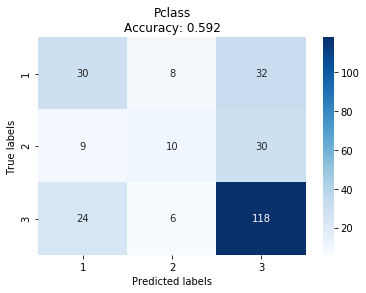

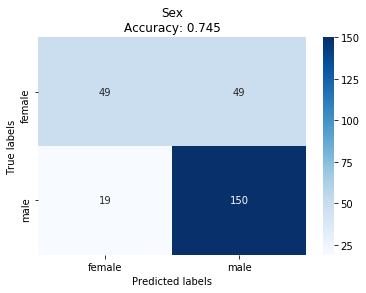

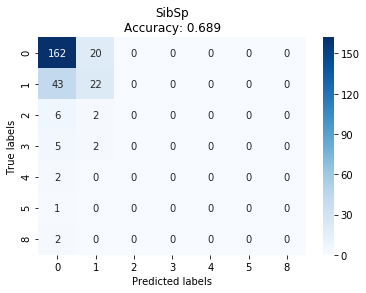

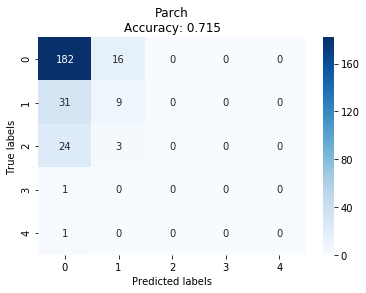

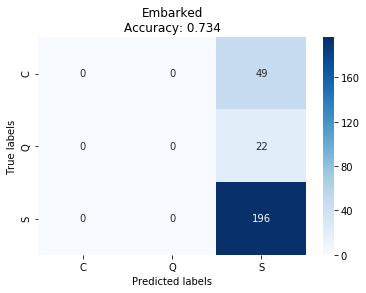

In [11]:
def train_model(y_var):
    '''
    @param string y_var - Name of the column to predict
                          All the remaining columns will be used
                          to try to predict it
    '''
    global LABELS

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(y_var, axis=1), df[y_var], test_size=0.3, random_state=0)

    # Train
    model = BernoulliNB()
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    score  = accuracy_score(y_test, y_pred, normalize=True)

    # Display Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = LABELS[y_var] if y_var in LABELS else sorted(y_test.unique())

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title("{0:s}\nAccuracy: {1:.3f}".format(y_var, score))
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

for y_var in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    train_model(y_var)